In [1]:
import numpy as np
import matplotlib.pyplot as plt

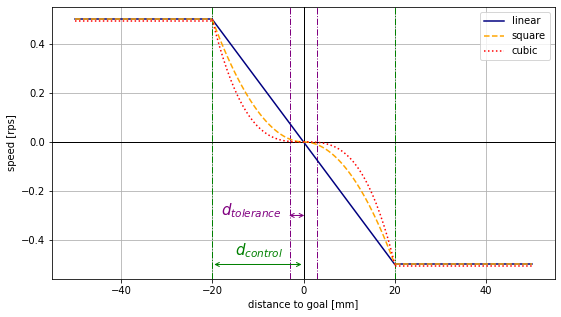

In [99]:
start, end, num = -50, 50, 50  # [mm]
d_goal = 20  # [mm]
d_tolerance = 3   # [mm]
desired_speed = 0.5   # [rps]

fig = plt.figure(figsize=(9,5))
plt.axvline(x=0, color='black', lw=1)
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=-d_goal, color='green', ls="-.", lw=1)
plt.axvline(x=d_goal,  color='green', ls="-.", lw=1)

plt.axvline(x=-d_tolerance, color='purple', ls="-.", lw=1)
plt.axvline(x=d_tolerance,  color='purple', ls="-.", lw=1)


""" LINEAR """
x1 = np.linspace(start, -d_goal, num=num)
x2 = np.linspace(-d_goal, d_goal, num=num)
x3 = np.linspace(d_goal, end, num=num)

y1 = np.ones(len(x1)) * desired_speed 
y2 = x2 * -(desired_speed/d_goal)
y3 = np.ones(len(x1)) * -desired_speed

plt.plot(x1, y1, c="navy", label="linear")
plt.plot(x2, y2, c="navy")
plt.plot(x3, y3, c="navy")



""" Quadratic """
x1 = np.linspace(start, -d_goal, num=num)
x2 = np.linspace(-d_goal, 0, num=num)
x3 = np.linspace(0, d_goal, num=num)
x4 = np.linspace(d_goal, end, num=num)

y1 = np.ones(len(x1)) * desired_speed 
y2 = x2**2 * (desired_speed/d_goal**2)
y3 = x3**2 *  -(desired_speed/d_goal**2)
y4 = np.ones(len(x1)) * -desired_speed

plt.plot(x1, y1, c="orange", ls="--", label="square")
plt.plot(x2, y2, c="orange", ls="--")
plt.plot(x3, y3, c="orange", ls="--")
plt.plot(x4, y4, c="orange", ls="--")



""" CUBIC """
x1 = np.linspace(start, -d_goal, num=num)
x2 = np.linspace(-d_goal, d_goal, num=num)
x3 = np.linspace(d_goal, end, num=num)

y1 = np.ones(len(x1)) * desired_speed -0.008
y2 = x2**3 * -(desired_speed/d_goal**3)
y3 = np.ones(len(x1)) * -desired_speed - 0.008

plt.plot(x1, y1, c="red", ls=":", label="cubic")
plt.plot(x2, y2, c="red", ls=":")
plt.plot(x3, y3, c="red", ls=":")


""" ADDITIONAL PLOTTING STUFF """

plt.ylabel("speed [rps]")
plt.xlabel("distance to goal [mm]")
plt.text(-15, -0.46, "$d_{control}$", fontsize=15, color="green")
plt.annotate('', xy=(-20, -0.5), xytext=(0, -0.5),
            arrowprops=dict(arrowstyle='<->', color='green'))

plt.text(-18, -0.3, "$d_{tolerance}$", fontsize=15, color="purple")
plt.annotate('', xy=(-3.6, -0.3), xytext=(0.6, -0.3),
            arrowprops=dict(arrowstyle='<->', color='purple'))

plt.legend()
plt.grid()
plt.savefig("speed-goal-graph.png", bbox_inches="tight")